<h1>Nabar_Deven_HW1</h1>
<hr>
<h2>Name - Deven Parag Nabar <br> Github Username - DevenNabar <br> USCID: 7229446568 </h2>
<br><hr>
<h2>Vertebral Column Data</h2>
<hr>


### (a) Download Data

Package imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Get the Vertebral Column Data Set

In [3]:
PATH = '../data/vertebral_column_data/column_2C.dat'

In [4]:
df = pd.read_csv(PATH, sep='\s+', header=None)

# Assign column names to the data set columns
df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class_label']

In [5]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [6]:
#Encoding labels
df.loc[df['class_label']=='NO','class_label']=0
df.loc[df['class_label']=='AB','class_label']=1

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

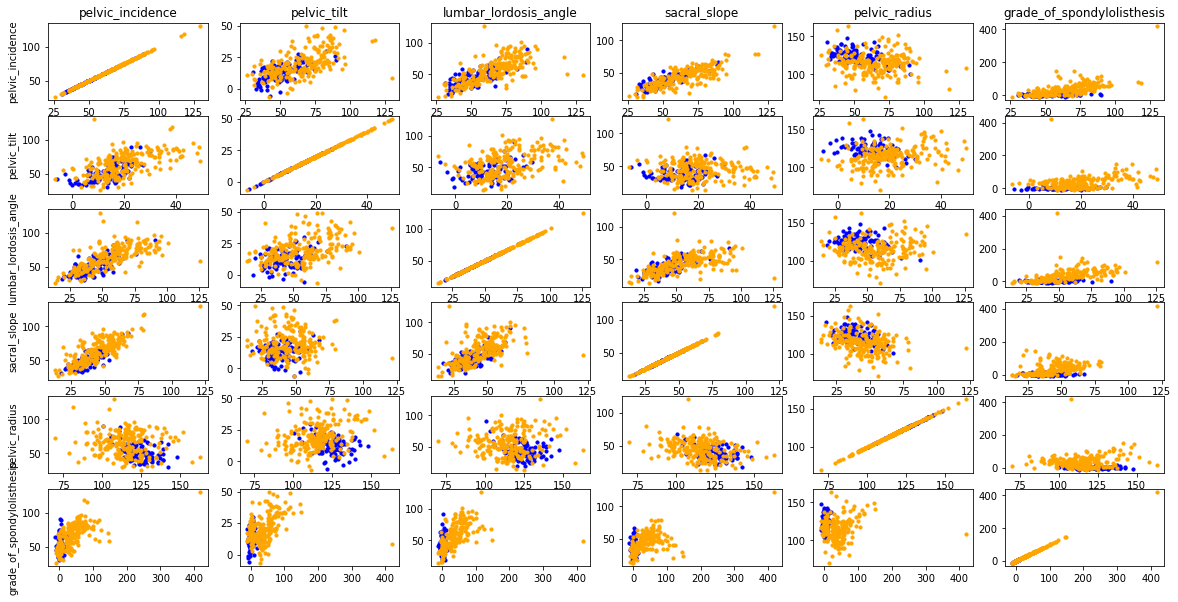

In [7]:
#Scatterplots

colors = {0:'blue', 1:'orange'}
plt.figure(figsize=(20,10))
for i, feature1 in enumerate(df.columns[:-1]):
    for j, feature2 in enumerate(df.columns[:-1]):
        plt.subplot(6, 6, i*6+j+1)
        for k, (key, color) in enumerate(colors.items()):
            plt.scatter(df[df['class_label'] == key][feature1], df[df['class_label'] == key][feature2], c=color, s=10)
        if i == 0:
            plt.title(feature2)
        if j == 0:
            plt.ylabel(feature1)

#### ii. Boxplots

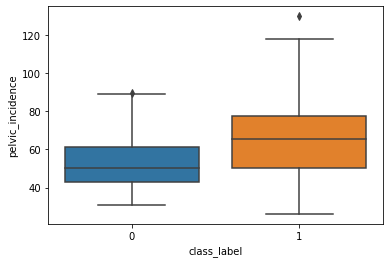

In [8]:
#Boxplots

sns.boxplot(x="class_label", y="pelvic_incidence", data=df)
plt.show()

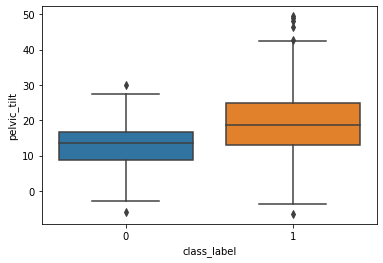

In [9]:
sns.boxplot(x="class_label", y="pelvic_tilt", data=df)
plt.show()

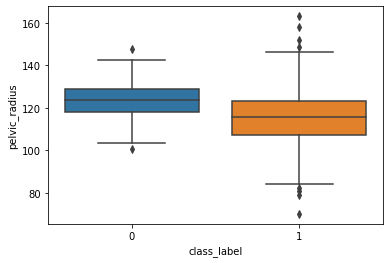

In [10]:
sns.boxplot(x="class_label", y="pelvic_radius", data=df)
plt.show()


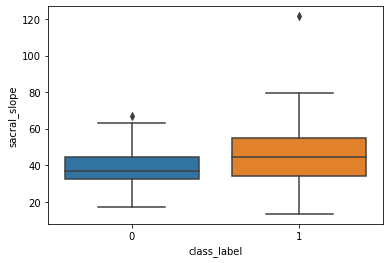

In [11]:
sns.boxplot(x="class_label", y="sacral_slope", data=df)
plt.show()

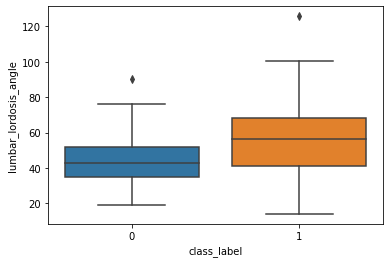

In [12]:
sns.boxplot(x="class_label", y="lumbar_lordosis_angle", data=df)
plt.show()

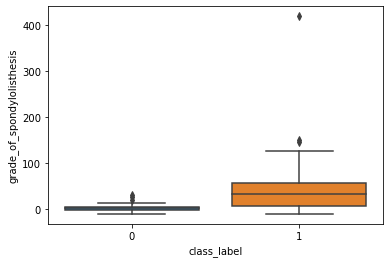

In [13]:
sns.boxplot(x="class_label", y="grade_of_spondylolisthesis", data=df)
plt.show()

#### iii. Split Data Set

In [14]:
#Creating Training data from dataframe
first_half_training = df[df['class_label']==0].iloc[:70]
second_half_training = df[df['class_label']==1].iloc[:140]

first_half_test = df[df['class_label']==0].iloc[70:]
second_half_test = df[df['class_label']==1].iloc[140:]


training_data = pd.concat([first_half_training,second_half_training])
test_data = pd.concat([first_half_test,second_half_test])

In [15]:
first_half_training

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_label
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
275,67.29,16.72,51.00,50.57,137.59,4.96,0
276,51.33,13.63,33.26,37.69,131.31,1.79,0
277,65.76,13.21,44.00,52.55,129.39,-1.98,0
278,40.41,-1.33,30.98,41.74,119.34,-6.17,0


In [16]:
second_half_training

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [17]:
test_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_label
280,50.09,13.43,34.46,36.66,119.13,3.09,0
281,64.26,14.50,43.90,49.76,115.39,5.95,0
282,53.68,13.45,41.58,40.24,113.91,2.74,0
283,49.00,13.11,51.87,35.88,126.40,0.54,0
284,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


In [18]:
training_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_label
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [19]:
xtrain = training_data.iloc[:,:-1].astype('float')
ytrain = training_data.iloc[:,-1].astype('float')

xtest = test_data.iloc[:,:-1].astype('float')
ytest = test_data.iloc[:,-1].astype('float')

In [20]:
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors

In [21]:
#Sklearn
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report


### (c) Classification

#### i. Euclidean Metric

In [22]:

#Running the KNN For a test value of K=3 with the Eucliden Metric
z=KNeighborsClassifier(n_neighbors=3)
z.fit(xtrain,ytrain)
preds = z.predict(xtest)
s = accuracy_score(ytest,preds)
s

0.92

accuracy for KNN implementation where K=3 is 0.92, and MIN error = 0.08

#### ii. Test Data

In [23]:
def findOptimalK():
    maxAccuracy = 0
    error = 1
    hmap={}
    bb={}
    accArray=[]
    for i in range(208,0,-3):
        knn= KNeighborsClassifier(n_neighbors=i)
        knn.fit(xtrain,ytrain)
        y_pred = knn.predict(xtest)
        acc = accuracy_score(ytest,y_pred)
        accArray.append(acc)
        mse = mean_squared_error(ytest,y_pred)
        hmap[acc] = i
        bb[mse]=i
        maxAccuracy = max(maxAccuracy,acc)
        error=min(mse,error)
    print(maxAccuracy, 'K value is ', hmap[maxAccuracy])
    print('MIN ERROR IS', error, )
findOptimalK()

0.94 K value is  4
MIN ERROR IS 0.06


Optimal Value of K=4, and Error is 0.06

In [24]:
#Confusion Martix for optimal value of K=4
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(xtrain,ytrain)
yPred4 = knn4.predict(xtest)

confMatrix = confusion_matrix(ytest,yPred4)
confMatrix

array([[25,  5],
       [ 1, 69]], dtype=int64)

In [25]:
#F1-Score and precision value for K=4
print(classification_report(ytest,yPred4))

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89        30
         1.0       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [26]:
import numpy as np
import math

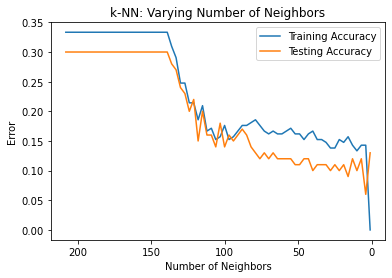

In [27]:
trainAccArray=[]
testAccArray=[]
for i in range(208,0,-3):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    testAccArray.append(1-model.score(xtest,ytest))
    trainAccArray.append(1-model.score(xtrain,ytrain))
neighbors=np.arange(208,0,-3)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, trainAccArray, label = 'Training Accuracy')
plt.plot(neighbors, testAccArray, label = 'Testing Accuracy')
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()


In [28]:
#Calculate TP & TN
tp = confMatrix[1,1]/(confMatrix[1,1]+confMatrix[1,0])
tn = confMatrix[0,0]/(confMatrix[0,0]+confMatrix[0,1])
tp,tn

(0.9857142857142858, 0.8333333333333334)

Here, True Positive is 0.9857142857142858 and True Negative is 0.8333333333333334

#### iii. Learning Curve

In [29]:
testingError = []
# neighbors=np.arange(10,211,10)
for i in range(10,211,10):
    bloo=math.floor(i/3)
    xtrain_0=first_half_training.head(bloo)
    xtrain_1=second_half_training.head(i-bloo)
    finalTraining=pd.concat((xtrain_0,xtrain_1))
    xtrain_LC=finalTraining.iloc[:,:-1].astype('int')
    ytrain_LC=finalTraining.iloc[:,-1].astype('int')
    max_acc=0
    k=0
    for j in range(1,197,5):
        if(j<i):
            knn = KNeighborsClassifier(n_neighbors=j)
            knn.fit(xtrain_LC, ytrain_LC)
            y_pred = knn.predict(xtest)
            acc2=accuracy_score(ytest, y_pred)
            if(acc2>max_acc):
                max_acc=acc2
                k=j
    testingError.append(1-max_acc)
# print("Accuracy:",max_acc)
print("Most Suitable K for learning curve question:",k)

Most Suitable K for learning curve question: 6


Optimal value of K for learning curve is k* is 6

Text(0, 0.5, 'Test Errors')

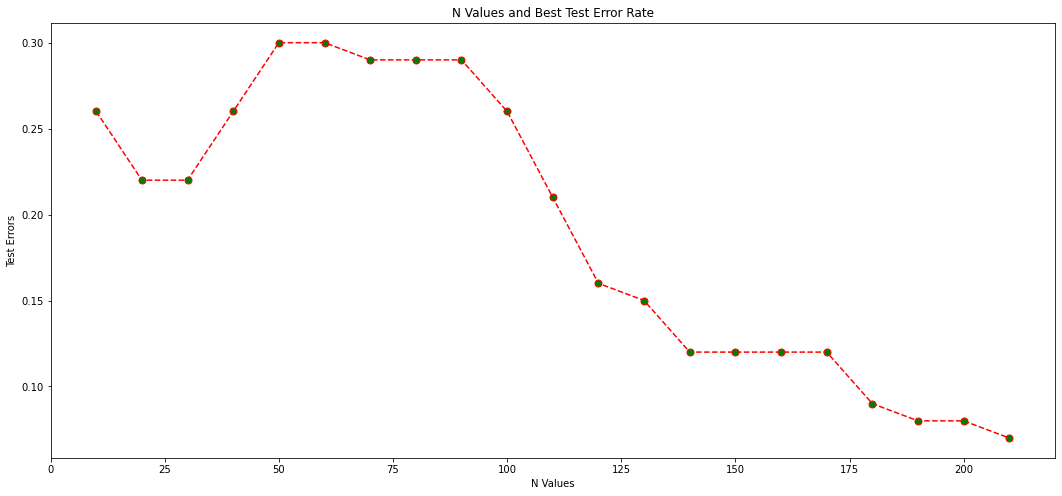

In [30]:
#Learning curve graph
plt.figure(figsize=(18, 8))
plt.plot(range(10, 211, 10), testingError, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.title('N Values and Best Test Error Rate')
plt.xlabel('N Values')
plt.ylabel('Test Errors')

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [31]:
#TRYING OTHER DISTANCE METRICS

#BEST K FOR MANHATTAN DISTANCE, P=1
scoreTracker={}
maxVal=0
kk=0
for k in range(1,197,5):
    p=1
    model = KNeighborsClassifier(n_neighbors=k, p=p, metric='manhattan')
    model.fit(xtrain,ytrain)
    results = model.predict(xtest)
    score = accuracy_score(ytest,results)
    scoreTracker[score] = k
#     maxVal = max(maxVal,score)
    if score>maxVal:
        kk=k
        maxVal=score
#     print(f'ACCURACY FOR K: {k} - {score}')
mann=1-maxVal
print(f'MIN ERROR FOR MANHATTAN is {1-maxVal} and k* value is {kk}')

MIN ERROR FOR MANHATTAN is 0.10999999999999999 and k* value is 6


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [32]:
#BEST K FOR MINKOWSKI DISTANCE, P=0.1,0.2,0.3.   
maxVal=0
logMaxVal=0
pTracker = {}
i=0.1
while i<=1:
    pp=pow(10,i)
    ml = KNeighborsClassifier(n_neighbors=6, p=pp,metric='minkowski')
    ml.fit(xtrain,ytrain)
    results = ml.predict(xtest)
    score = accuracy_score(ytest,results)
    pTracker[score]=i
    maxVal = max(maxVal,score)
    i+=0.1
logMaxVal=1-maxVal
print(f'FINAL MIN ERROR for minkowski is {1-maxVal}, and value of FINAL P is: {pTracker[maxVal]} for given K* =6')

FINAL MIN ERROR for minkowski is 0.06000000000000005, and value of FINAL P is: 0.6 for given K* =6


##### C. Chebyshev Distance With p -> infinity.

In [33]:
#Trying other distance Metrics

scoreTracker={}
maxVal=0
for k in range(1,197,5):
    model = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', n_jobs=-1)
    model.fit(xtrain,ytrain)
    results = model.predict(xtest)
    score = accuracy_score(ytest,results)
    scoreTracker[score] = k
    maxVal = max(maxVal,score)
chebyyy=1-maxVal
print(f'MIN ERRROR FOR CHEBYSHEV is {1-maxVal} and k value is {scoreTracker[maxVal]}')

MIN ERRROR FOR CHEBYSHEV is 0.07999999999999996 and k value is 16


#### ii. Mahalanobis Distance.

In [34]:
scoreTracker={}
maxVal=0
kk=0
for k in range(1,197,5):
    model = KNeighborsClassifier(n_neighbors=k,
                                 metric_params={'VI': np.linalg.inv(np.cov(xtrain.T))},
                             metric='mahalanobis')
    model.fit(xtrain,ytrain)
    results = model.predict(xtest)
    score = accuracy_score(ytest,results)
    scoreTracker[score] = k
    if score>maxVal:
        kk=k
        maxVal=score
mahalaError=1-maxVal
print(f'MINERROR for MAHALANOBIS: {1-maxVal} and k is {kk}')

MINERROR for MAHALANOBIS: 0.17000000000000004 and k is 1


### (e) Weighted Decision

In [35]:
#Weighted polling

#Euclidean
def euclidean():
    scoreTracker={}
    maxVal=0
    kk=0
    for k in range(1,197,5):
        model = KNeighborsClassifier(n_neighbors=k
                                 ,weights='distance')
        model.fit(xtrain,ytrain)
        results = model.predict(xtest)
        score = accuracy_score(ytest,results)
        scoreTracker[score] = k
        if score>maxVal:
            maxVal=score
            kk=k
    print(f'MIN ERROR WEIGHTED DISTANCE EUCLIDEAN is {1-maxVal} and k value is {kk}')
    return (maxVal,scoreTracker[maxVal])


#Chebyshev
def cheby():
    scoreTracker={}
    maxVal=0
    kk=0
    for k in range(1,197,5):
        model = KNeighborsClassifier(n_neighbors=k,
                                 metric='chebyshev',weights='distance')
        model.fit(xtrain,ytrain)
        results = model.predict(xtest)
        score = accuracy_score(ytest,results)
        scoreTracker[score] = k
        if score>maxVal:
            maxVal=score
            kk=k
    print(f'MIN ERROR WEIGHTED DISTANCE CHEBYSHEV is {1-maxVal} and k value is {kk}')
    return (maxVal,scoreTracker[maxVal])

#Manhattan
def man():
    scoreTracker={}
    maxVal=0
    kk=0
    for k in range(1,197,5):
        model = KNeighborsClassifier(n_neighbors=k,p=1,
                                 metric='manhattan',weights='distance')
        model.fit(xtrain,ytrain)
        results = model.predict(xtest)
        score = accuracy_score(ytest,results)
        scoreTracker[score] = k
        if score>maxVal:
            maxVal=score
            kk=k
    print(f'MIN ERROR WEIGHTED DISTANCE MANHATTAN is {1-maxVal} and k value is {kk}')
    return (maxVal,scoreTracker[maxVal])
(maxVal1,k1)=euclidean()
(maxVal2,k2)=cheby()
(maxVal3,k3)=man()


MIN ERROR WEIGHTED DISTANCE EUCLIDEAN is 0.09999999999999998 and k value is 6
MIN ERROR WEIGHTED DISTANCE CHEBYSHEV is 0.10999999999999999 and k value is 16
MIN ERROR WEIGHTED DISTANCE MANHATTAN is 0.09999999999999998 and k value is 26


In [36]:
metricTable={'Distance_Metrics':['Manhattan_Distance_p=1', 'Mahahattan_Distance_log10p', 
                                 'Chebyshev_Distance', 'Mahalanobis_Distance'], 
             'Best Test errors are':[mann,logMaxVal,chebyyy,mahalaError]}
df1 = pd.DataFrame(data=metricTable)
df1

,Distance_Metrics,Best Test errors are
0,Manhattan_Distance_p=1,0.11
1,Mahahattan_Distance_log10p,0.06
2,Chebyshev_Distance,0.08
3,Mahalanobis_Distance,0.17


In [37]:
metricTable2={'Distance_Metrics for weighted distance':['Euclidean', 'Chebyshev', 
                                 'Manhattan'], 
             'Best Test errors are':[1-maxVal1,1-maxVal2,1-maxVal3]}
df2 = pd.DataFrame(data=metricTable2)
df2

,Distance_Metrics for weighted distance,Best Test errors are
0,Euclidean,0.10
1,Chebyshev,0.11
2,Manhattan,0.10


### (f) Training Error Rate

If we predict results on the same data we trained the model on we get the lowest training error rate of 0. The best training error rate is achieved here which is 0.0

In [38]:
#pip freeze > requirements.txt